In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import os
import matplotlib.pyplot as plt
from data_loader import bench, squat, deadlift

data/ ['Deadlift', 'Bench', 'Squat'] .DS_Store
data/Deadlift [] Neal_25_deadlift-2024-09-13_00-44-42.json
data/Deadlift [] Brian_Deadlift_25lbs-2024-09-13_00-42-14.json
data/Bench [] brian_bench_25lbs-2024-09-13_00-17-29.json
data/Bench [] Tejas_Bench_8-2024-10-01_01-37-00.json
data/Bench [] .DS_Store
data/Bench [] Novel_Bench_5-2024-10-01_01-45-12.json
data/Bench [] Neal_Bench_0lbs-2024-09-13_00-10-30.json
data/Bench [] Tejas_Bench_0lbs-2024-09-13_00-13-30.json
data/Bench [] Novel_Bench_8-2024-10-01_01-33-18.json
data/Bench [] Novel_Bench_0lbs-2024-09-13_00-15-12.json
data/Bench [] Brian_Bench_8-2024-10-01_01-35-13.json
data/Bench [] Tejas_Bench_25lbs-2024-09-13_00-21-16.json
data/Bench [] Brian_Bench_8-2024-10-01_01-28-30.json
data/Bench [] Tejas_Bench_8-2024-10-01_01-42-17.json
data/Bench [] Neal_Bench_25lbs-2024-09-13_00-19-25.json
data/Bench [] Brian_Bench_0_lbs-2024-09-13_00-07-34.json
data/Bench [] Novel_Bench_8-2024-10-01_01-38-34.json
data/Squat [] Brian_8_Squat-2024-10-01_01-

In [5]:
bench

[      relativeAltitude  seconds_elapsed    pressure          sensor  \
 0                 0.00         7.011909  100.453018  WatchBarometer   
 1                 0.00         7.867835  100.453293  WatchBarometer   
 2                -0.03        10.968242  100.454849  WatchBarometer   
 3                -0.04        46.088523  100.455017  WatchBarometer   
 4                  NaN              NaN         NaN        Metadata   
 ...                ...              ...         ...             ...   
 4174               NaN        45.906367         NaN     WristMotion   
 4175               NaN        45.916329         NaN     WristMotion   
 4176               NaN        45.926291         NaN     WristMotion   
 4177               NaN        45.936253         NaN     WristMotion   
 4178               NaN        45.946215         NaN     WristMotion   
 
               time                             device id  version  \
 0     1.726273e+18                                   NaN      N

In [6]:
squat

[      relativeAltitude  seconds_elapsed    pressure          sensor  \
 0            -0.020000         4.759369  100.881134  WatchBarometer   
 1            -0.030001         7.386022  100.881035  WatchBarometer   
 2            -0.049999         9.823655  100.881523  WatchBarometer   
 3            -0.070000        12.405498  100.883171  WatchBarometer   
 4            -0.120001        14.804084  100.884308  WatchBarometer   
 ...                ...              ...         ...             ...   
 2299               NaN        22.939474         NaN     WristMotion   
 2300               NaN        22.949436         NaN     WristMotion   
 2301               NaN        22.959398         NaN     WristMotion   
 2302               NaN        22.969361         NaN     WristMotion   
 2303               NaN        22.979323         NaN     WristMotion   
 
               time device id  version device name sampleRateMs  \
 0     1.727834e+18       NaN      NaN         NaN          NaN   


In [7]:
deadlift

[      relativeAltitude  seconds_elapsed    pressure          sensor  \
 0                 0.22        39.491781  100.456367  WatchBarometer   
 1                  NaN              NaN         NaN        Metadata   
 2                  NaN         0.130352         NaN     WristMotion   
 3                  NaN         0.140314         NaN     WristMotion   
 4                  NaN         0.150276         NaN     WristMotion   
 ...                ...              ...         ...             ...   
 2664               NaN        40.367102         NaN     WristMotion   
 2665               NaN        40.377064         NaN     WristMotion   
 2666               NaN        40.387027         NaN     WristMotion   
 2667               NaN        40.396989         NaN     WristMotion   
 2668               NaN        40.406951         NaN     WristMotion   
 
               time                             device id  version  \
 0     1.726275e+18                                   NaN      N

In [8]:
ax = bench[1].axes

In [9]:
len(deadlift), len(bench), len(squat)

(2, 14, 11)

In [10]:
ax

[RangeIndex(start=0, stop=1178, step=1),
 Index(['relativeAltitude', 'seconds_elapsed', 'pressure', 'sensor', 'time',
        'device id', 'version', 'device name', 'sampleRateMs',
        'recording epoch time', 'recording time', 'platform', 'standardisation',
        'recording timezone', 'appVersion', 'sensors', 'accelerationY',
        'quaternionW', 'accelerationZ', 'gravityX', 'rotationRateY',
        'rotationRateZ', 'gravityY', 'quaternionX', 'quaternionY',
        'quaternionZ', 'gravityZ', 'accelerationX', 'rotationRateX'],
       dtype='object')]

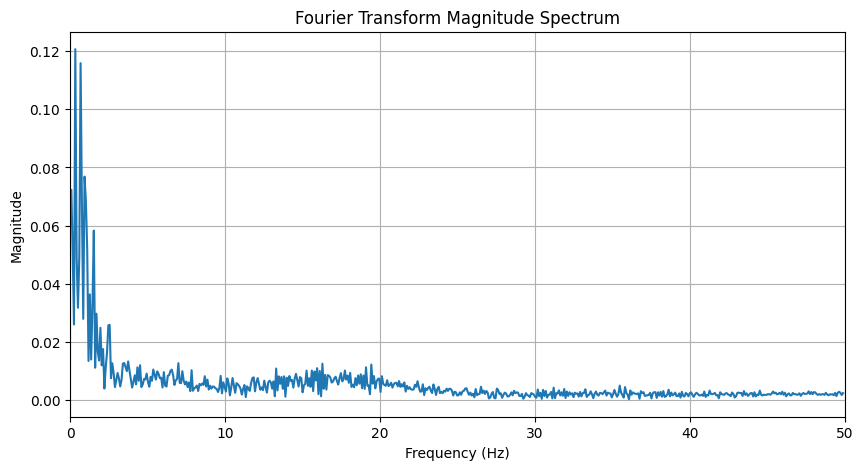

In [21]:
pt = bench[1]['rotationRateY'][5:]
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 100  # Sampling frequency in Hz
N = len(pt)  # Number of samples
t = np.arange(N) / fs  # Time vector

# Simulate some sensor data (replace this with your actual data)
# Example: a signal with frequency components
signal = pt#np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

# Compute the FFT
fft_result = np.fft.fft(signal)
fft_magnitude = np.abs(fft_result) / N  # Normalize

# Generate frequency bins
freq_bins = np.fft.fftfreq(N, d=1/fs)

# Select the positive frequency bins (0 to fs/2)
positive_freqs = freq_bins[:N//2]
positive_magnitude = fft_magnitude[:N//2]

# Optionally, plot the results
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, positive_magnitude)
plt.title("Fourier Transform Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 50)  # Focus on the 0 to 50 Hz range
plt.grid()
plt.show()


In [22]:

def plot_fft(s, signame=None):
    s = np.nan_to_num(s.to_numpy(), 0)
    f = fft(s)
    sample_rate = 100
    N = len(f)
    freqs = fftfreq(N, 1/sample_rate)
    
    positive_freqs = freqs[:N//2]
    positive_fft_values = np.abs(f[:N//2])
    print(freqs, len(positive_freqs))
    plt.plot(positive_fft_values)
    plt.title('signal ' + (signame if signame is not None else ""))
    plt.show()
    plt.plot(fft(s).real)
    plt.title('real part of fft')
    plt.show()
    plt.plot(fft(s).imag)
    plt.title('im part of fft')
    plt.show()

[ 0.          0.08525149  0.17050298 ... -0.25575448 -0.17050298
 -0.08525149] 586


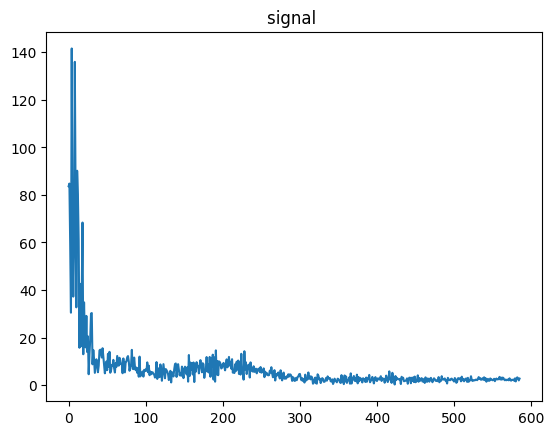

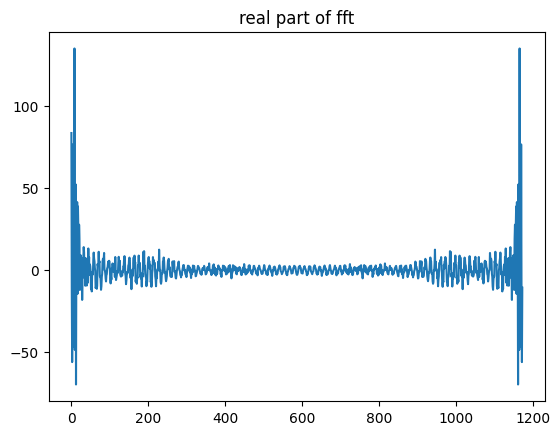

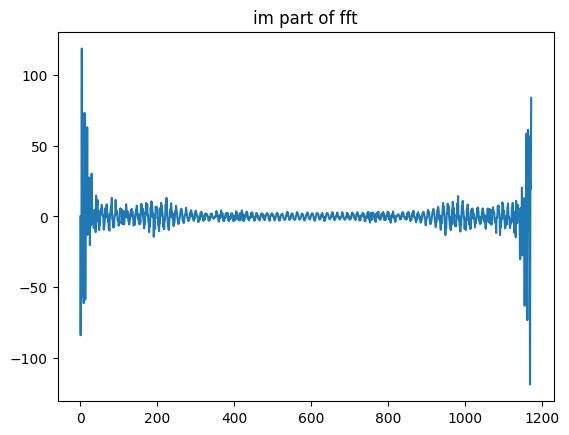

In [23]:
#plot_fft(np.sin(np.linspace(-np.pi,np.pi,200)))
plot_fft(pt)

In [24]:
def plot_fft_against_eachother(s1, s2, s3, signame):
    s1 = np.nan_to_num(s1.to_numpy(), 0)
    s2 = np.nan_to_num(s2.to_numpy(), 0)
    s3 = np.nan_to_num(s3.to_numpy(), 0)
    i=1
    
    for s, name in zip([s1, s2, s3], signame):
        plt.subplot(3, 3, i)
        plt.plot(s)
        plt.title('signal ' + (name if name is not None else ""))
        i+=1
        
        plt.subplot(3, 3, i)
        plt.plot(abs(fft(s)))
        plt.title('mag of fft')
        i+=1

        plt.subplot(3, 3, i)
        plt.plot(np.arctan(fft(s).imag/fft(s).real))
        plt.title('phase part of fft')
        
        i+=1
    plt.tight_layout()
    plt.show()

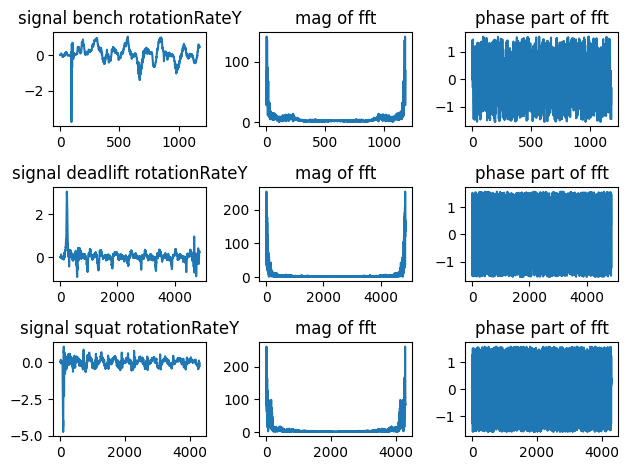

In [25]:
idx = 1
pt1 = bench[idx]['rotationRateY']
pt2 = deadlift[idx]['rotationRateY']
pt3 = squat[idx]['rotationRateY']

plot_fft_against_eachother(pt1, pt2, pt3, ['bench rotationRateY', 'deadlift rotationRateY', 'squat rotationRateY' ])

In [23]:
def compare_all(a, b, c, label):
    idx1, idx2, idx3 = a, b, c
    pt1 = bench[idx1][label ]
    pt2 = deadlift[idx2][label]
    pt3 = squat[idx3][label]

    plot_fft_against_eachother(pt1, pt2, pt3, [f'bench {label}', f'deadlift {label}', f'squat {label}' ])

In [24]:
compare_all(1, 2, 4, 'gravityX')

IndexError: list index out of range

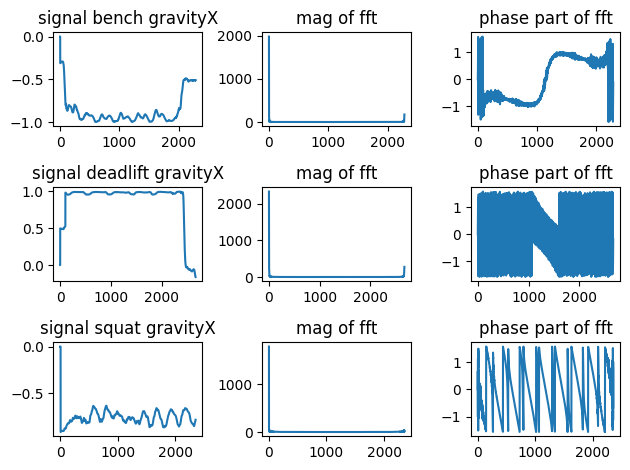

In [25]:
compare_all(2, 0, 2, 'gravityX')

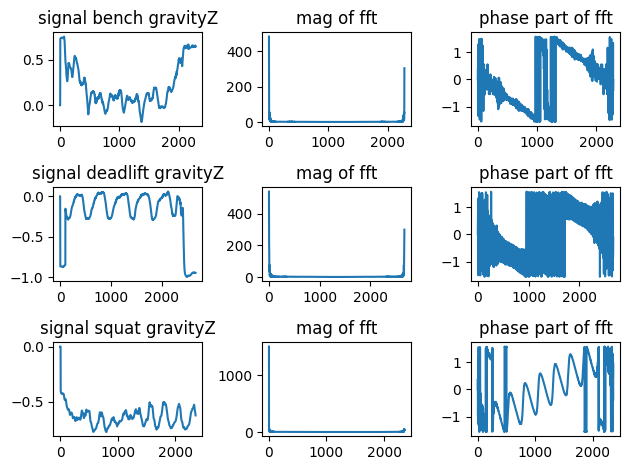

In [26]:
compare_all(2, 0, 2, 'gravityZ')

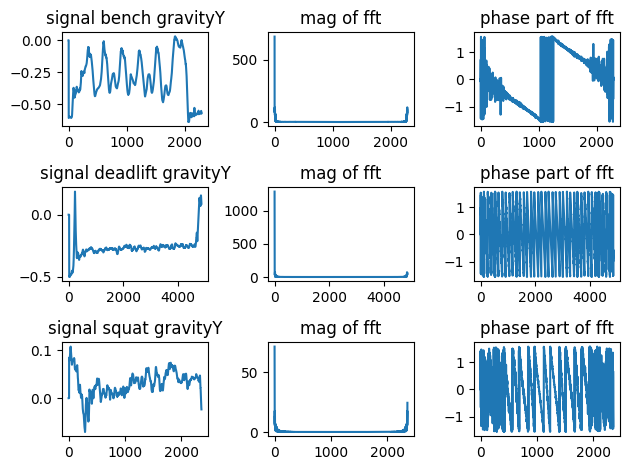

In [27]:
compare_all(2, 1, 2, 'gravityY')

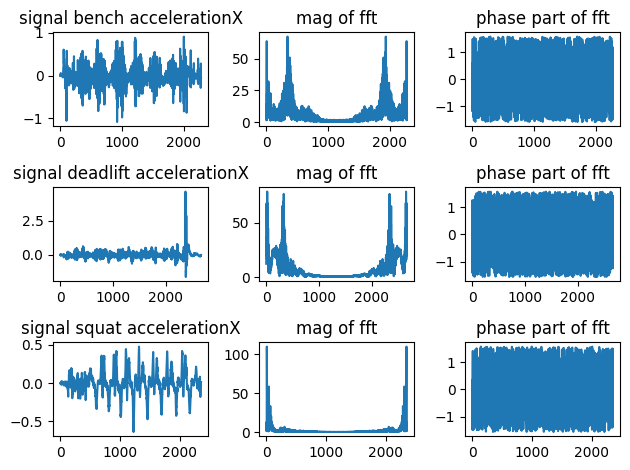

In [28]:
compare_all(2, 0, 2, 'accelerationX')

In [29]:
ax

[RangeIndex(start=0, stop=1178, step=1),
 Index(['relativeAltitude', 'seconds_elapsed', 'pressure', 'sensor', 'time',
        'device id', 'version', 'device name', 'sampleRateMs',
        'recording epoch time', 'recording time', 'platform', 'standardisation',
        'recording timezone', 'appVersion', 'sensors', 'accelerationY',
        'quaternionW', 'accelerationZ', 'gravityX', 'rotationRateY',
        'rotationRateZ', 'gravityY', 'quaternionX', 'quaternionY',
        'quaternionZ', 'gravityZ', 'accelerationX', 'rotationRateX'],
       dtype='object')]

In [32]:
def plot_all_data(bench, label):
    i = 1
    
    for s in bench:
        plt.subplot(len(bench), 1, i)
        plt.plot(np.nan_to_num(s[label].to_numpy(), 0))
        i+=1
        
    plt.show()

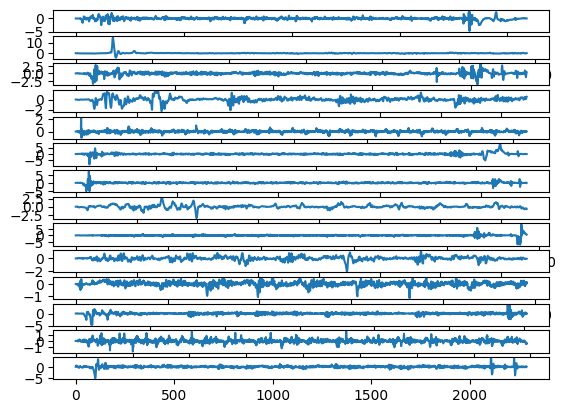

In [33]:
plot_all_data(bench, 'rotationRateX')